## Imports and loading the data

In [9]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

warnings.simplefilter("ignore")

In [10]:
data_train = pd.read_csv("../data/exoTrain.csv")
data_test = pd.read_csv("../data/exoTest.csv")

# Replace all ones with zeros and twos with ones
data_train["LABEL"] -= 1
data_test["LABEL"] -= 1


## Visualizing the data structure

In [11]:
data_train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,0,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,0,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,0,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,0,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


## Split flux data and labels, respectively, to x and y values 

In [12]:
x_train = data_train.drop("LABEL", axis=1)
y_train = data_train["LABEL"]

x_test = data_test.drop("LABEL", axis=1)
y_test = data_test["LABEL"]

### Quick function for preprocessing the data

In [ ]:
def get_exoplanet_data(
    trainfile: str = "../data/exoTrain.csv", testfile: str = "../data/exoTest.csv"
) -> (pd.DataFrame, pd.DataFrame):
    data_train = pd.read_csv("../data/exoTrain.csv")
    data_test = pd.read_csv("../data/exoTest.csv")

    # Replace all ones with zeros and twos with ones
    data_train["LABEL"] -= 1
    data_test["LABEL"] -= 1

    x_train = data_train.drop("LABEL", axis=1)
    y_train = data_train["LABEL"]

    x_test = data_test.drop("LABEL", axis=1)
    y_test = data_test["LABEL"]

    return x_test, y_test

## Try classification tree

In [13]:
# Parameters
rng_seed = 2023
depth = 5

tree_model = DecisionTreeClassifier(max_depth=depth, random_state=rng_seed, class_weight="balanced")
tree_model.fit(x_train, y_train);

## Visualize tree

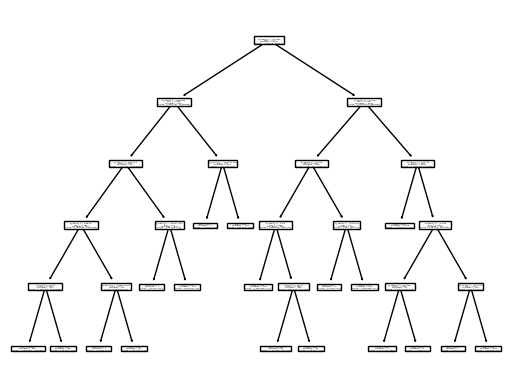

In [14]:
plot_tree(tree_model);

## Test prediction

In [15]:
pred = tree_model.predict(x_test)
accuracy_score(y_test, pred)

0.9350877192982456

## Plot confusion matrix 

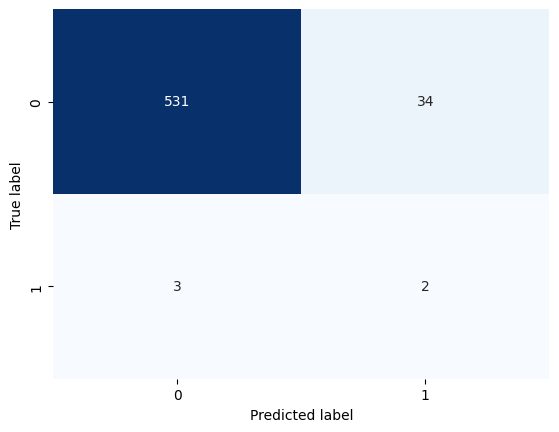

In [16]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues", cbar=False,
                            fmt=".0f")
plt.xlabel("Predicted label")
plt.ylabel("True label");

## Plot accuracy as function of max tree depth

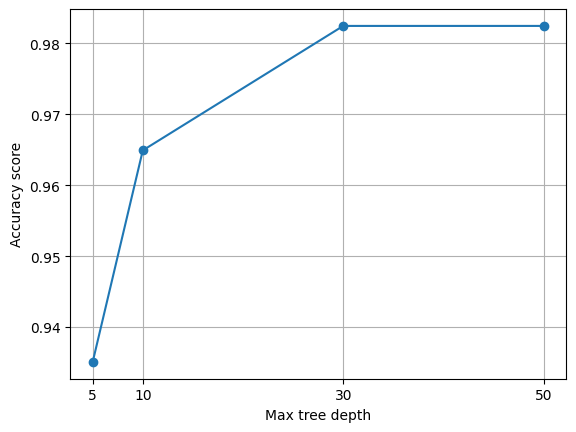

In [19]:
# Parameters
depths = np.asarray([5, 10, 30, 50])
filename = "../results/figures/class_tree_asfuncof_depth.png"

accuracies = np.empty(depths.shape)

for i, depth in enumerate(depths):
    model = DecisionTreeClassifier(
        max_depth=depth, random_state=rng_seed, class_weight="balanced"
    )
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracies[i] = accuracy_score(y_test, pred)

plt.plot(depths, accuracies, "-o")
plt.xlabel("Max tree depth")
plt.ylabel("Accuracy score")
plt.xticks(depths)
plt.grid(True)

if filename:
    plt.savefig(filename)
plt.show()

## Plot last model with 50 depth

Accuracy = 0.9824561403508771


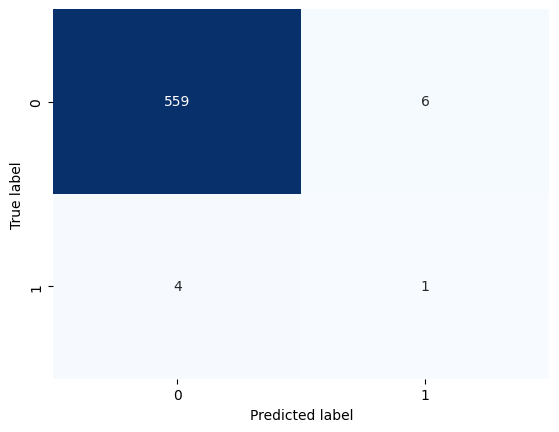

In [21]:
sns.heatmap(
    confusion_matrix(y_test, pred), annot=True, cmap="Blues", cbar=False, fmt=".0f"
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
print(f"Accuracy = {accuracies[-1]}")